In [1]:
#Data Manipulation
import numpy as np
import pandas as pd

#Data Visualization
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import scipy

# Statistical Calculation
from scipy.stats import norm

#Tabular Data Output
#from tabulate import tabulate

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load data from excel file
data = pd.read_excel("Backtest data.xlsx")

# Extract gold data
gold_data = pd.DataFrame()
gold_data[["Date", "GOLD"]] = data[["Unnamed: 8", "Unnamed: 9"]][5:]
gold_data

,Date,GOLD
5,1968-04-01 00:00:00,37.7
6,1968-04-02 00:00:00,37.3
7,1968-04-03 00:00:00,37.6
8,1968-04-04 00:00:00,36.95
9,1968-04-05 00:00:00,37
...,...,...
13059,2019-11-08 00:00:00,1464.15
13060,2019-11-11 00:00:00,1458.7
13061,2019-11-12 00:00:00,1452.05
13062,2019-11-13 00:00:00,1462.9


### VaR Historical Simulation approach

### VaR 2003 - 2004

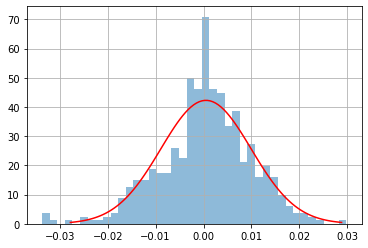

In [3]:
gold_data = gold_data.set_index('Date', drop=False)
df_2003_2004 = gold_data.loc['2003-01-01':'2004-12-31']
df_2003_2004['returns'] = df_2003_2004.GOLD.pct_change()


mean = np.mean(df_2003_2004['returns'])
std_dev = np.std(df_2003_2004['returns'])

df_2003_2004['returns'].hist(bins=40, normed=True, histtype='stepfilled', alpha=0.5)

x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 100)
plt.plot(x, scipy.stats.norm.pdf(x, mean, std_dev), 'r')

#plt.show()


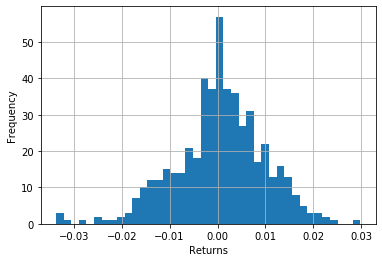

In [4]:
df_2003_2004['returns'].dropna()
plt.hist(df_2003_2004.returns, bins=40)
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [5]:
df_2003_2004.sort_values('returns', inplace=True, ascending=True)

var_90 = df_2003_2004['returns'].quantile(0.1)
var_95 = df_2003_2004['returns'].quantile(0.05)
var_99 = df_2003_2004['returns'].quantile(0.01)

#print(tabulate([['90%', var_90],['95%', var_95], ['99%', var_99]], headers=['Confidence Level', 'Value at Risk']))
#print(([[var_90],[ var_95], [ var_99]]))
print("Confidence_Level  Value-at-Risk")
print(f" 90% \t\t{var_90}\n 95% \t\t{var_95}\n 99% \t\t{var_99}")

Confidence_Level  Value-at-Risk
 90% 		-0.012166522008633773
 95% 		-0.01569177150572501
 99% 		-0.02485767789921463


### VaR Variance Covariance 2003 - 2004

In [6]:
df_2003_2004['returns'] = df_2003_2004.GOLD.pct_change()


mean = np.mean(df_2003_2004['returns'])
std_dev = np.std(df_2003_2004['returns'])

var_90 = norm.ppf(1-0.9, mean, std_dev)
var_95 = norm.ppf(1-0.95, mean, std_dev)
var_99 = norm.ppf(1-0.99, mean, std_dev)

#print(tabulate([['90%', var_90],['95%', var_95], ['99%', var_99]], headers=['Confidence Level', 'Value at Risk']))
print("Confidence_Level  Value-at-Risk")
print(f" 90% \t\t{var_90}\n 95% \t\t{var_95}\n 99% \t\t{var_99}")

Confidence_Level  Value-at-Risk
 90% 		-0.13823320973587844
 95% 		-0.17914733018313364
 99% 		-0.25589541578867964


### VaR Historical Simulation approach 2007 - 2009

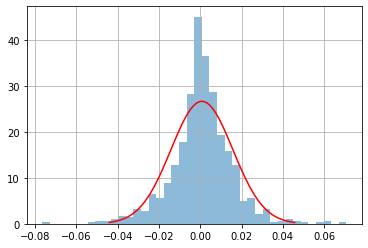

In [7]:
gold_data = gold_data.set_index('Date', drop=False)
df_2007_2009 = gold_data.loc['2007-01-01':'2009-12-31']
df_2007_2009['returns'] = df_2007_2009.GOLD.pct_change()


mean = np.mean(df_2007_2009['returns'])
std_dev = np.std(df_2007_2009['returns'])

df_2007_2009['returns'].hist(bins=40, normed=True, histtype='stepfilled', alpha=0.5)

x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 100)
plt.plot(x, scipy.stats.norm.pdf(x, mean, std_dev), 'r')

plt.show()

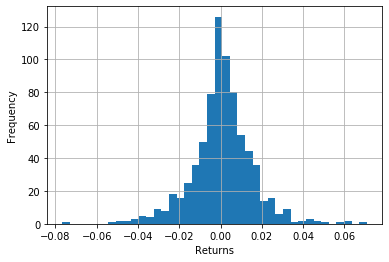

In [8]:
df_2007_2009['returns'].dropna()
plt.hist(df_2007_2009.returns, bins=40)
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [9]:
df_2007_2009.sort_values('returns', inplace=True, ascending=True)

var_90 = df_2007_2009['returns'].quantile(0.1)
var_95 = df_2007_2009['returns'].quantile(0.05)
var_99 = df_2007_2009['returns'].quantile(0.01)

#print(tabulate([['90%', var_90],['95%', var_95], ['99%', var_99]], headers=['Confidence Level', 'Value at Risk']))
print("Confidence_Level  Value-at-Risk")
print(f" 90% \t\t{var_90}\n 95% \t\t{var_95}\n 99% \t\t{var_99}")

Confidence_Level  Value-at-Risk
 90% 		-0.016365899271178107
 95% 		-0.02397482027661427
 99% 		-0.040388455566088326


### VaR Variance Covariance 2007 - 2009

In [10]:
df_2007_2009['returns'] = df_2007_2009.GOLD.pct_change()


mean = np.mean(df_2007_2009['returns'])
std_dev = np.std(df_2007_2009['returns'])

var_90 = norm.ppf(1-0.9, mean, std_dev)
var_95 = norm.ppf(1-0.95, mean, std_dev)
var_99 = norm.ppf(1-0.99, mean, std_dev)

#print(tabulate([['90%', var_90],['95%', var_95], ['99%', var_99]], headers=['Confidence Level', 'Value at Risk']))
print("Confidence_Level  Value-at-Risk")
print(f" 90% \t\t{var_90}\n 95% \t\t{var_95}\n 99% \t\t{var_99}")

Confidence_Level  Value-at-Risk
 90% 		-0.2759017701882893
 95% 		-0.3614561845812536
 99% 		-0.5219420375822577


### VaR Historical Simulation approach 2018 - 2019

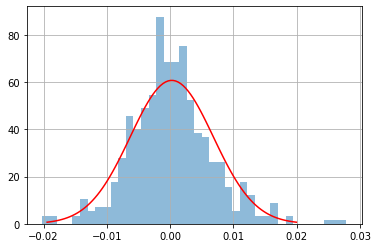

In [11]:
gold_data = gold_data.set_index('Date', drop=False)
df_2018_2019 = gold_data.loc['2018-01-01':'2019-12-31']
df_2018_2019['returns'] = df_2018_2019.GOLD.pct_change()


mean = np.mean(df_2018_2019['returns'])
std_dev = np.std(df_2018_2019['returns'])

df_2018_2019['returns'].hist(bins=40, normed=True, histtype='stepfilled', alpha=0.5)

x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 100)
plt.plot(x, scipy.stats.norm.pdf(x, mean, std_dev), 'r')

plt.show()

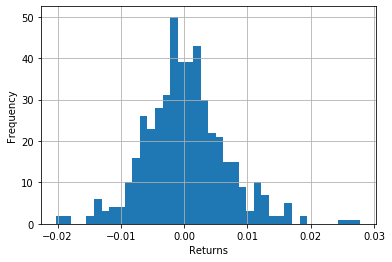

In [12]:
df_2018_2019['returns'].dropna()
plt.hist(df_2018_2019.returns, bins=40)
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [13]:
df_2018_2019.sort_values('returns', inplace=True, ascending=True)

var_90 = df_2018_2019['returns'].quantile(0.1)
var_95 = df_2018_2019['returns'].quantile(0.05)
var_99 = df_2018_2019['returns'].quantile(0.01)

#print(tabulate([['90%', var_90],['95%', var_95], ['99%', var_99]], headers=['Confidence Level', 'Value at Risk']))
print("Confidence_Level  Value-at-Risk")
print(f" 90% \t\t{var_90}\n 95% \t\t{var_95}\n 99% \t\t{var_99}")

Confidence_Level  Value-at-Risk
 90% 		-0.0071534908418098165
 95% 		-0.0093062834625806
 99% 		-0.01455817934843851


### VaR Variance Covariance 2018 - 2019

In [14]:
df_2018_2019['returns'] = df_2018_2019.GOLD.pct_change()


mean = np.mean(df_2018_2019['returns'])
std_dev = np.std(df_2018_2019['returns'])

var_90 = norm.ppf(1-0.9, mean, std_dev)
var_95 = norm.ppf(1-0.95, mean, std_dev)
var_99 = norm.ppf(1-0.99, mean, std_dev)

#print(tabulate([['90%', var_90],['95%', var_95], ['99%', var_99]], headers=['Confidence Level', 'Value at Risk']))
print("Confidence_Level  Value-at-Risk")
print(f" 90% \t\t{var_90}\n 95% \t\t{var_95}\n 99% \t\t{var_99}")

Confidence_Level  Value-at-Risk
 90% 		-0.11742691218545913
 95% 		-0.15200241510650186
 99% 		-0.21686030839691028


## ES Historical Approach

### ES 2003 - 2004

In [15]:
Es_90 = df_2003_2004[df_2003_2004['returns'] < df_2003_2004['returns'].quantile(0.1)]['returns'].mean()
Es_95 = df_2003_2004[df_2003_2004['returns'] < df_2003_2004['returns'].quantile(0.05)]['returns'].mean()
Es_99 = df_2003_2004[df_2003_2004['returns'] < df_2003_2004['returns'].quantile(0.01)]['returns'].mean()

#print(tabulate([['90%', Es_90],['95%', Es_95], ['99%', Es_99]], headers=['Confidence Level', 'Expected Shortfall']))
print("Confidence_Level  Expected Shortfall")
print(f" 90% \t\t{Es_90}\n 95% \t\t{Es_95}\n 99% \t\t{Es_99}")

Confidence_Level  Expected Shortfall
 90% 		-0.17745813127970067
 95% 		-0.19873345247412721
 99% 		-0.2306615227260168


### ES 2007 - 2009

In [16]:
Es_90 = df_2007_2009[df_2007_2009['returns'] < df_2007_2009['returns'].quantile(0.1)]['returns'].mean()
Es_95 = df_2007_2009[df_2007_2009['returns'] < df_2007_2009['returns'].quantile(0.05)]['returns'].mean()
Es_99 = df_2007_2009[df_2007_2009['returns'] < df_2007_2009['returns'].quantile(0.01)]['returns'].mean()

#print(tabulate([['90%', Es_90],['95%', Es_95], ['99%', Es_99]], headers=['Confidence Level', 'Expected Shortfall']))
print("Confidence_Level  Expected Shortfall")
print(f" 90% \t\t{Es_90}\n 95% \t\t{Es_95}\n 99% \t\t{Es_99}")

Confidence_Level  Expected Shortfall
 90% 		-0.3232712611440345
 95% 		-0.3640696700612236
 99% 		-0.4222034573109753


### ES 2018 - 2019

In [17]:
Es_90 = df_2018_2019[df_2018_2019['returns'] < df_2018_2019['returns'].quantile(0.1)]['returns'].mean()
Es_95 = df_2018_2019[df_2018_2019['returns'] < df_2018_2019['returns'].quantile(0.05)]['returns'].mean()
Es_99 = df_2018_2019[df_2018_2019['returns'] < df_2018_2019['returns'].quantile(0.01)]['returns'].mean()

#print(tabulate([['90%', Es_90],['95%', Es_95], ['99%', Es_99]], headers=['Confidence Level', 'Expected Shortfall']))
print("Confidence_Level  Expected Shortfall")
print(f" 90% \t\t{Es_90}\n 95% \t\t{Es_95}\n 99% \t\t{Es_99}")

Confidence_Level  Expected Shortfall
 90% 		-0.15740188186310597
 95% 		-0.180918852254328
 99% 		-0.20392553040785266


## ES Variance Coveriance Approach

### ES 2003 - 2004

In [18]:
mean = np.mean(df_2003_2004['returns'])
std_dev = np.std(df_2003_2004['returns'])

var_90 = norm.ppf(1-0.9, mean, std_dev)
var_95 = norm.ppf(1-0.95, mean, std_dev)
var_99 = norm.ppf(1-0.99, mean, std_dev)

Es_90 = var_90.mean()
Es_95 = var_95.mean()
Es_99 = var_99.mean()

#print(tabulate([['90%', Es_90],['95%', Es_95], ['99%', Es_99]], headers=['Confidence Level', 'Expected Shortfall']))
print("Confidence_Level  Expected Shortfall")
print(f" 90% \t\t{Es_90}\n 95% \t\t{Es_95}\n 99% \t\t{Es_99}")

Confidence_Level  Expected Shortfall
 90% 		-0.13823320973587844
 95% 		-0.17914733018313364
 99% 		-0.25589541578867964


### ES 2007 - 2009

In [19]:
mean = np.mean(df_2007_2009['returns'])
std_dev = np.std(df_2007_2009['returns'])

var_90 = norm.ppf(1-0.9, mean, std_dev)
var_95 = norm.ppf(1-0.95, mean, std_dev)
var_99 = norm.ppf(1-0.99, mean, std_dev)

Es_90 = var_90.mean()
Es_95 = var_95.mean()
Es_99 = var_99.mean()

#print(tabulate([['90%', Es_90],['95%', Es_95], ['99%', Es_99]], headers=['Confidence Level', 'Expected Shortfall']))
print("Confidence_Level  Expected Shortfall")
print(f" 90% \t\t{Es_90}\n 95% \t\t{Es_95}\n 99% \t\t{Es_99}")

Confidence_Level  Expected Shortfall
 90% 		-0.2759017701882893
 95% 		-0.3614561845812536
 99% 		-0.5219420375822577


### ES 2018 - 2019

In [20]:
mean = np.mean(df_2018_2019['returns'])
std_dev = np.std(df_2018_2019['returns'])

var_90 = norm.ppf(1-0.9, mean, std_dev)
var_95 = norm.ppf(1-0.95, mean, std_dev)
var_99 = norm.ppf(1-0.99, mean, std_dev)

Es_90 = var_90.mean()
Es_95 = var_95.mean()
Es_99 = var_99.mean()

#print(tabulate([['90%', Es_90],['95%', Es_95], ['99%', Es_99]], headers=['Confidence Level', 'Expected Shortfall']))
print("Confidence_Level  Expected Shortfall")
print(f" 90% \t\t{Es_90}\n 95% \t\t{Es_95}\n 99% \t\t{Es_99}")

Confidence_Level  Expected Shortfall
 90% 		-0.11742691218545913
 95% 		-0.15200241510650186
 99% 		-0.21686030839691028
